## Data Preparation

In [1]:
# Connect google drive on Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Install AutoGluon in the environment
!pip install -U pip

In [3]:
# Install AutoGluon in the environment
!pip install -U setuptools wheel

In [4]:
# Install AutoGluon in the environment
!pip install autogluon

  Using cached autogluon-1.1.1-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.core-1.1.1-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.features-1.1.1-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.tabular-1.1.1-py3-none-any.whl.metadata (13 kB)
  Using cached autogluon.multimodal-1.1.1-py3-none-any.whl.metadata (12 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3

In [ ]:
# Import all required modules and packages
from autogluon.tabular import TabularDataset, TabularPredictor
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
# Define the directory path
dir_path = '/content/drive/MyDrive/Projets/Optimal_Functioning_(N=1066)'

In [ ]:
# Change current directory to the selected directory path
os.chdir(dir_path)

In [ ]:
# Import the raw data containing all the items
raw_data = pd.read_csv('./data/Base_1066_recodee_2017-06.txt', sep = '\s+', encoding='latin', na_values=999)

In [ ]:
# check
raw_data.head(2)

,Id,Sexe,Age,Situfam,Enfant,Situpro,Typecontrat,Jourabsence,Revenus,Nivetude,Taillentrep,Manager,CSP1,CSP2,Secteur,CodePostal,ZoneFR1,ZoneFR2,MHCA1,MHCA2,MHCA3,MHCA4,MHCA5,MHCA6,MHCA7,MHCA8,MHCA9,MHCA10,MHCA11,MHCA12,MHCA13,MHCA14,MHCB1,MHCB2,MHCB3,MHCB4,MHCB5,MHCB6,MHCB7,MHCB8,MHCB9,MHCB10,MHCB11,MHCB12,MHCB13,MHCB14,MHCC1,MHCC2,MHCC3,MHCC4,MHCC5,MHCC6,MHCC7,MHCC8,MHCC9,MHCC10,MHCC11,MHCC12,MHCC13,MHCC14,PE1,PE2,PE3,PE4,PE5,PE6,PE7,PE8,PE9,PE10,PE11,PE12,PE13,PE14,PE15,PE16,PE17,PE18,PE19,PE20,Flux1,Flux2,Flux3,Flux4,Flux5,Flux6,Flux7,Flux8,Flux9,Flux10,Flux11,Flux12,Flux13,Cap1,Cap2,Cap3,AD1,AD2,AD3,AD4,AD5,AD6,AD7,AD8,AD9,AD10,EfP1,EfP2,EfP3,EfP4,EfP5,EfP6,EfP7,EfP8,UF1,UF2,UF3,UF4,UF5,UF6,HSE1,HSE2,HSE3,HSE4,HSE5,HSE6,HSE7,HSE8,HSE9,HSE10,HSE11,HSE12,HSE13,HSE14,HSE15,HSE16,HSE17,HSE18,HSE19,HSE20,HSE21,HSE22,HSE23,HSE24,HSE25,HSE26,HSE27,HSE28,HSE29,HSE30,HSE31,HSE32,HSE33,HSE34,HSE35,ALQ1,ALQ2,ALQ3,ALQ4,ALQ5,ALQ6,ALQ7,ALQ8,ALQ9,ALQ10,ALQ11,ALQ12,ALQ13,ALQ14,ALQ15,ALQ16,abs1,abs2,abs3,abs4,abs5,abs6,abs7,abs8,abs9,abs10,abs11,Imp1,Imp2,Imp3,Imp4,Imp5,Imp6,Force1,Force2,Force3,Force4,Force5,Force6,Force7,Force8,Force9,Force10,Force11,Force12,Force13,Force14,Force15,Force16,Force17,Force18,Force19,Force20,Force21,Force22,Force23,Force24,DÃ.marche,ExperDP,PratDP,cabs1,cabs2,cabs3,cabs4,cabs5,cabs6,cabs7
0,303,2,43,1,1,2,6,1.0,2,2,1,1,5,56,11,69008.0,5,8,6.0,5.0,5.0,NaN,1.0,NaN,NaN,NaN,5.0,5.0,5.0,6.0,6.0,6.0,6.0,5.0,5.0,1.0,1.0,1.0,5.0,NaN,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,NaN,NaN,4.0,1.0,1.0,NaN,6.0,5.0,2.0,6.0,NaN,6.0,5.0,5.0,5.0,NaN,NaN,5.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,NaN,5.0,1.0,NaN,4,7,4,5.0,5.0,6.0,5.0,6.0,5.0,4.0,5.0,6.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,6.0,6.0,NaN,5.0,5.0,5.0,3.0,5.0,3.0,3.0,NaN,4.0,3.0,4.0,5.0,3.0,NaN,5.0,5.0,3.0,NaN,5.0,3.0,2.0,5.0,NaN,4.0,NaN,5.0,NaN,5.0,3.0,4.0,5.0,3.0,3.0,4.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180,180,0,0,0,0,0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,1.0,4.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0,8.0,9.0,9.0,8.0,8.0,8.0,9.0,5.0,8.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,2,NaN,NaN,7,10,0,0,0,0,0
1,864,1,56,2,2,2,1,1.0,3,2,1,1,6,63,5,47240.0,4,7,1.0,2.0,1.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,3.0,3.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,4.0,1.0,1.0,4.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,5.0,6.0,1.0,6.0,1.0,1.0,6.0,2.0,2.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,6.0,4,3,4,4.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,4.0,4.0,1.0,1.0,5.0,4.0,3.0,4.0,1.0,4.0,1.0,1.0,2.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,3.0,1.0,3.0,4.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,144,0,0,0,0,0,5.0,3.0,5.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,5.0,5.0,5.0,5.0,6.0,4.0,7.0,7.0,5.0,4.0,4.0,5.0,8.0,4.0,6.0,8.0,7.0,8.0,6.0,3.0,6.0,7.0,4.0,3.0,2,NaN,NaN,7,10,0,0,0,0,0


In [ ]:
# replace variables to be consistent with previous research
raw_data.rename(columns={'Jourabsence':'GenAbs','cabs7':'ManAbs','cabs1':'PhysPres','cabs2':'PsycPres','abs8':'Turnover','abs10':'Unhappy'}, inplace=True)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 222 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    Id           1066 non-null   int64  
 1    Sexe         1066 non-null   int64  
 2    Age          1066 non-null   int64  
 3    Situfam      1066 non-null   int64  
 4    Enfant       1066 non-null   int64  
 5    Situpro      1066 non-null   int64  
 6    Typecontrat  1066 non-null   int64  
 7    GenAbs       1065 non-null   float64
 8    Revenus      1066 non-null   int64  
 9    Nivetude     1066 non-null   int64  
 10   Taillentrep  1066 non-null   int64  
 11   Manager      1066 non-null   int64  
 12   CSP1         1066 non-null   int64  
 13   CSP2         1066 non-null   int64  
 14   Secteur      1066 non-null   int64  
 15   CodePostal   1062 non-null   float64
 16   ZoneFR1      1066 non-null   int64  
 17   ZoneFR2      1066 non-null   int64  
 18   MHCA1        1054 non-null

In [ ]:
# import the data with the factors scores, the probability and the FOP class
var_names = ['FOP','POSEM','NEGEM','FLOW','SELFDET','PERSEFF','STRENGTH','CPROB1','CPROB2','CPROB3','CPROB4','CL_FOP','ID']
clfop_data = pd.read_csv('./data/Bi_ESEM_FOP_4cl_free.dat', sep='\s+', header = None, names=var_names )

In [ ]:
# check
clfop_data.info()
clfop_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FOP       1066 non-null   float64
 1   POSEM     1066 non-null   float64
 2   NEGEM     1066 non-null   float64
 3   FLOW      1066 non-null   float64
 4   SELFDET   1066 non-null   float64
 5   PERSEFF   1066 non-null   float64
 6   STRENGTH  1066 non-null   float64
 7   CPROB1    1066 non-null   float64
 8   CPROB2    1066 non-null   float64
 9   CPROB3    1066 non-null   float64
 10  CPROB4    1066 non-null   float64
 11  CL_FOP    1066 non-null   float64
 12  ID        1066 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 108.4 KB


,FOP,POSEM,NEGEM,FLOW,SELFDET,PERSEFF,STRENGTH,CPROB1,CPROB2,CPROB3,CPROB4,CL_FOP,ID
0,1.601,0.025,0.131,0.446,-0.020,-0.559,-0.220,0.013,0.0,0.900,0.087,3.0,303
1,-2.503,-1.433,-1.133,-0.144,-0.886,-2.131,-0.027,0.001,0.0,0.001,0.998,4.0,864
2,-0.797,-0.462,-0.058,-0.411,-0.273,0.688,-1.010,0.819,0.0,0.072,0.109,1.0,898
3,0.519,1.041,-0.841,-0.360,-2.028,1.721,1.203,0.000,0.0,0.004,0.996,4.0,162
4,0.631,-0.930,0.777,-0.735,-0.764,-2.280,-0.968,0.030,0.0,0.006,0.964,4.0,1204


In [ ]:
# this to allow the possibility to compare quality of prediction with or wihout factor scores
'''
Set this variable True if you want to include the factor scores
'''
include_factor_scores = True

In [ ]:
# define the columns of the factor score data with the raw data
if include_factor_scores:
  clfop_df = clfop_data.drop(columns=['CPROB1','CPROB2','CPROB3','CPROB4'])
else:
  clfop_df = clfop_data[['ID','CL_FOP']]

In [ ]:
# now merge the raw data with factor score data
data = pd.merge(raw_data, clfop_df, left_on='Id',right_on='ID').drop(columns='ID')

In [ ]:
# check
data.info()
data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 230 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    Id           1066 non-null   int64  
 1    Sexe         1066 non-null   int64  
 2    Age          1066 non-null   int64  
 3    Situfam      1066 non-null   int64  
 4    Enfant       1066 non-null   int64  
 5    Situpro      1066 non-null   int64  
 6    Typecontrat  1066 non-null   int64  
 7    GenAbs       1065 non-null   float64
 8    Revenus      1066 non-null   int64  
 9    Nivetude     1066 non-null   int64  
 10   Taillentrep  1066 non-null   int64  
 11   Manager      1066 non-null   int64  
 12   CSP1         1066 non-null   int64  
 13   CSP2         1066 non-null   int64  
 14   Secteur      1066 non-null   int64  
 15   CodePostal   1062 non-null   float64
 16   ZoneFR1      1066 non-null   int64  
 17   ZoneFR2      1066 non-null   int64  
 18   MHCA1        1054 non-null

,Id,Sexe,Age,Situfam,Enfant,Situpro,Typecontrat,GenAbs,Revenus,Nivetude,Taillentrep,Manager,CSP1,CSP2,Secteur,CodePostal,ZoneFR1,ZoneFR2,MHCA1,MHCA2,MHCA3,MHCA4,MHCA5,MHCA6,MHCA7,MHCA8,MHCA9,MHCA10,MHCA11,MHCA12,MHCA13,MHCA14,MHCB1,MHCB2,MHCB3,MHCB4,MHCB5,MHCB6,MHCB7,MHCB8,MHCB9,MHCB10,MHCB11,MHCB12,MHCB13,MHCB14,MHCC1,MHCC2,MHCC3,MHCC4,MHCC5,MHCC6,MHCC7,MHCC8,MHCC9,MHCC10,MHCC11,MHCC12,MHCC13,MHCC14,PE1,PE2,PE3,PE4,PE5,PE6,PE7,PE8,PE9,PE10,PE11,PE12,PE13,PE14,PE15,PE16,PE17,PE18,PE19,PE20,Flux1,Flux2,Flux3,Flux4,Flux5,Flux6,Flux7,Flux8,Flux9,Flux10,Flux11,Flux12,Flux13,Cap1,Cap2,Cap3,AD1,AD2,AD3,AD4,AD5,AD6,AD7,AD8,AD9,AD10,EfP1,EfP2,EfP3,EfP4,EfP5,EfP6,EfP7,EfP8,UF1,UF2,UF3,UF4,UF5,UF6,HSE1,HSE2,HSE3,HSE4,HSE5,HSE6,HSE7,HSE8,HSE9,HSE10,HSE11,HSE12,HSE13,HSE14,HSE15,HSE16,HSE17,HSE18,HSE19,HSE20,HSE21,HSE22,HSE23,HSE24,HSE25,HSE26,HSE27,HSE28,HSE29,HSE30,HSE31,HSE32,HSE33,HSE34,HSE35,ALQ1,ALQ2,ALQ3,ALQ4,ALQ5,ALQ6,ALQ7,ALQ8,ALQ9,ALQ10,ALQ11,ALQ12,ALQ13,ALQ14,ALQ15,ALQ16,abs1,abs2,abs3,abs4,abs5,abs6,abs7,Turnover,abs9,Unhappy,abs11,Imp1,Imp2,Imp3,Imp4,Imp5,Imp6,Force1,Force2,Force3,Force4,Force5,Force6,Force7,Force8,Force9,Force10,Force11,Force12,Force13,Force14,Force15,Force16,Force17,Force18,Force19,Force20,Force21,Force22,Force23,Force24,DÃ.marche,ExperDP,PratDP,PhysPres,PsycPres,cabs3,cabs4,cabs5,cabs6,ManAbs,FOP,POSEM,NEGEM,FLOW,SELFDET,PERSEFF,STRENGTH,CL_FOP
0,303,2,43,1,1,2,6,1.0,2,2,1,1,5,56,11,69008.0,5,8,6.0,5.0,5.0,NaN,1.0,NaN,NaN,NaN,5.0,5.0,5.0,6.0,6.0,6.0,6.0,5.0,5.0,1.0,1.0,1.0,5.0,NaN,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,NaN,NaN,4.0,1.0,1.0,NaN,6.0,5.0,2.0,6.0,NaN,6.0,5.0,5.0,5.0,NaN,NaN,5.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,NaN,5.0,1.0,NaN,4,7,4,5.0,5.0,6.0,5.0,6.0,5.0,4.0,5.0,6.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,6.0,6.0,NaN,5.0,5.0,5.0,3.0,5.0,3.0,3.0,NaN,4.0,3.0,4.0,5.0,3.0,NaN,5.0,5.0,3.0,NaN,5.0,3.0,2.0,5.0,NaN,4.0,NaN,5.0,NaN,5.0,3.0,4.0,5.0,3.0,3.0,4.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180,180,0,0,0,0,0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,1.0,4.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0,8.0,9.0,9.0,8.0,8.0,8.0,9.0,5.0,8.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,2,NaN,NaN,7,10,0,0,0,0,0,1.601,0.025,0.131,0.446,-0.020,-0.559,-0.220,3.0
1,864,1,56,2,2,2,1,1.0,3,2,1,1,6,63,5,47240.0,4,7,1.0,2.0,1.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,3.0,3.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,4.0,1.0,1.0,4.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,5.0,6.0,1.0,6.0,1.0,1.0,6.0,2.0,2.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,6.0,4,3,4,4.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,4.0,4.0,1.0,1.0,5.0,4.0,3.0,4.0,1.0,4.0,1.0,1.0,2.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,3.0,1.0,3.0,4.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,144,0,0,0,0,0,5.0,3.0,5.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,5.0,5.0,5.0,5.0,6.0,4.0,7.0,7.0,5.0,4.0,4.0,5.0,8.0,4.0,6.0,8.0,7.0,8.0,6.0,3.0,6.0,7.0,4.0,3.0,2,NaN,NaN,7,10,0,0,0,0,0,-2.503,-1.433,-1.133,-0.144,-0.886,-2.131,-0.027,4.0


In [ ]:
# check the number of missing values
col_miss = data.isnull().sum()
col_miss

,0
Id,0
Sexe,0
Age,0
Situfam,0
Enfant,0
Situpro,0
Typecontrat,0
GenAbs,1
Revenus,0
Nivetude,0


In [ ]:
# select for removal those variable that have more than 50% missing values
to_drop = data.columns[col_miss > 0.5*len(data)]

In [ ]:
# drop those columns with more than 50% missing values
data = data.drop(columns = to_drop)

In [ ]:
# check
data.isnull().sum()

,0
Id,0
Sexe,0
Age,0
Situfam,0
Enfant,0
Situpro,0
Typecontrat,0
GenAbs,1
Revenus,0
Nivetude,0


**We choose here to let AutoGluon handle the missing values**

## Recode Categorical Variables

In [ ]:
# Recode the Demarche Column
data.rename(columns={'DÃ.marche':'Demarche'}, inplace=True)
data.columns[196]

'Demarche'

In [ ]:
# recoding all categorical variables

data['Sexe'].replace({1:"Masculin",2:"Féminin"}, inplace=True)
data['Situfam'].replace({1:"Vit seul(e)", 2:"Vit en couple"}, inplace=True)
data['Situpro'].replace({1:"Indépendant", 2:"Salarié", 5:"En transition"}, inplace=True)
data['Revenus'].replace({1:'moins de 6000€', 2:'entre 6000€ et 11900€', 3:'entre 11901€ et 26490€', 4:'entre 26491€ et 70900€', 5:'entre 70901€ et 150000€', 6:'plus de 150001€'}, inplace=True)
data['Nivetude'].replace({1:'sans diplôme ou brevet de collège', 2: 'CAP/BEP', 3:'Baccalauréat', 4:'Bac+2 / +3', 5:'Bac+4 / Bac+5', 6:'Doctorat'}, inplace=True)
data['Taillentrep'].replace({1:"TPE (Moins de 10 salariés)",
                                 2:"Petite PME-PMI (Entre 10 et 49 salariés)",
                                 3:"Moyenne PME-PMI (Entre 50  et 199  salariés)",
                                 4:"Grande PME-PMI (Entre 200 et 499 salariés)",
                                 5:"Entreprise de Taille Intermédiaire (Entre 500 et 2000 salariés)",
                                 6:"Grands Groupes (Plus de 2000 salariés)"},inplace=True)
data['Manager'].replace({1:"Non", 2:"Manager intermédiaire ", 3:"Manager supérieur", 4:"Chef d'Entreprise"},inplace=True)
data['CSP1'].replace({1:"Agriculteurs",
                          2:"Artisans, commerçants et chefs d'entreprises",
                          3:"Cadres, professions intellectuelles supérieures et professions libérales",
                          4:"Professions intermédiaires",
                          5:"Employés",
                          6:"Ouvriers"},inplace=True)
data['CSP2'].replace({10:"Agriculteurs",
                          21:"Artisans",
                          22:"Commerçants et assimilés",
                          23:"Chefs d'entreprise de 10 salariés ou plus",
                          31:"Professions libérales",
                          33:"Cadres de la fonction publique",
                          34:"Professeurs, professions scientifiques",
                          35:"Professions de l'information, des arts et des spectacles",
                          37:"Cadres administratifs et commerciaux d'entreprises",
                          38:"Ingénieurs et cadres techniques d'entreprises",
                          42:"Professeurs des écoles, instituteurs et professions assimilées",
                          43:"Professions intermédiaires de la santé et du travail social",
                          44:"Clergé, religieux",
                          45:"Professions intermédiaires administratives de la fonction publique",
                          46:"Professions intermédiaires administratives et commerciales des entreprises",
                          47:"Techniciens (sauf techniciens tertiaires)",
                          48:"Contremaîtres, agents de maîtrise (maîtrise administrative exclue)",
                          52:"Employés civils et agents de service de la fonction publique",
                          53:"Agents de surveillance",
                          54:"Employés administratifs d'entreprise",
                          55:"Employés de commerce",
                          56:"Personnels des services directs aux particuliers",
                          62:"Ouvriers qualifiés de type industriel",
                          63:"Ouvriers qualifiés de type artisanal",
                          64:"Chauffeurs",
                          65:"Ouvriers qualifiés de la manutention, du magasinage et du transport",
                          67:"Ouvriers non qualifiés de type industriel",
                          68:"Ouvriers non qualifiés de type artisanal",
                          69:"Ouvriers agricoles et assimilés"}, inplace=True)
data['Secteur'].replace({1:"Industrie",
                             2:"Construction",
                             3:"Commerce et réparation",
                             4:"Transports et entreposages",
                             5:"Hébergement et restauration",
                             6:"Information et communication",
                             7:"Activités financières et d’assurance",
                             8:"Activités immobilières",
                             9:"Soutien aux entreprises",
                             10:"Enseignement, santé et action sociale",
                             11:"Services aux ménages",
                             12:"Autre"},inplace=True)
data['CL_FOP'].replace({1.0:"Fully Dysfunctioning",2.0:"Emotionally Functioning",3.0:"Self-Motivated Functioning",4.0:"Resilient Dysfunctioning"}, inplace=True)
data['ZoneFR1'].replace({0:np.nan,1:'Ile de France',2:'Nord-Ouest',3:'Nord Est',4:'Sud-Ouest',5:'Sud Est'}, inplace=True)
data['ZoneFR2'].replace({0:np.nan,1:'Ile de France',2:'Banlieue Parisienne Ouest',3:'Ouest',4:'Nord',5:'Est',6:'Banlieue Parisienne Est',7:'Sud-Ouest',8:'Centre Est',9:'Méditerranée'},inplace=True)
data['Typecontrat'].replace({1:'Temps plein contrat 35h', 2:'Temps plein forfait', 3:'Mi-temps contrat 35h', 4:'Mi-temps forfait', 5:'Durée hébdomadaire', 6:'Je ne sais pas'} ,inplace=True)
data['Demarche'].replace({1:'Oui', 2:'Non'},inplace=True)

In [ ]:
# get ready for Machine Learning : remove the ID and Postal Code variables
df = data.drop(columns=['Id','CodePostal'])

In [ ]:
# define the outcome
outcome = 'CL_FOP'

In [ ]:
# generate train and test data
train_data, test_data = train_test_split(df, test_size=0.2, stratify=df[outcome], random_state=0)

In [ ]:
path_to_model_data = "./factor_scores_models_data"
presets = "good_quality"

In [ ]:
# fit AutoGluon's tabular predictor
try:
  predictor = TabularPredictor.load(path_to_model_data)
except:
  predictor = TabularPredictor(label=outcome, path=path_to_model_data).fit(train_data, presets=presets)

This means that the predictor was fit in a version `<=0.3.1`.
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-f

In [ ]:
# check the first predicted classes
y_pred = predictor.predict(test_data)
y_pred.head()  # Predictions

908    Self-Motivated Functioning
708      Resilient Dysfunctioning
959          Fully Dysfunctioning
163    Self-Motivated Functioning
86       Resilient Dysfunctioning
Name: CL_FOP, dtype: object

In [ ]:
# check the first predicted probabilities
y_pred_proba = predictor.predict_proba(test_data)
y_pred_proba.head()  # Prediction Probabilities

,Emotionally Functioning,Fully Dysfunctioning,Resilient Dysfunctioning,Self-Motivated Functioning
908,0.000013,0.000827,0.000346,0.998815
708,0.000013,0.000741,0.996074,0.003172
959,0.000003,0.999930,0.000034,0.000033
163,0.000410,0.002327,0.287360,0.709903
86,0.000389,0.265776,0.732602,0.001234


In [ ]:
# evaluate performance on test data
predictor.evaluate(test_data)

{'accuracy': 0.8785046728971962,
 'balanced_accuracy': 0.822884012539185,
 'mcc': 0.8216301041726701}

In [ ]:
# check the leaderboard
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L2_FULL,0.887850,NaN,accuracy,0.760558,NaN,25.384364,0.014917,NaN,0.836582,2,True,39
1,RandomForestGini_BAG_L2_FULL,0.883178,NaN,accuracy,0.841932,NaN,25.388422,0.096291,0.139386,0.840641,2,True,40
2,LightGBM_BAG_L1_FULL,0.878505,NaN,accuracy,0.021830,NaN,1.000155,0.021830,NaN,1.000155,1,True,27
3,WeightedEnsemble_L2_FULL,0.878505,NaN,accuracy,0.025294,NaN,1.167357,0.003464,NaN,0.167202,2,True,36
4,WeightedEnsemble_L3_FULL,0.878505,NaN,accuracy,0.025604,NaN,1.329364,0.003775,NaN,0.329209,3,True,48
5,ExtraTreesEntr_BAG_L2_FULL,0.878505,NaN,accuracy,0.844563,NaN,25.307225,0.098923,0.140824,0.759443,2,True,44
6,RandomForestEntr_BAG_L2_FULL,0.878505,NaN,accuracy,0.846702,NaN,25.345510,0.101062,0.139547,0.797729,2,True,41
7,LightGBMLarge_BAG_L2_FULL,0.873832,NaN,accuracy,0.772119,NaN,26.303932,0.026478,NaN,1.756150,2,True,47
8,CatBoost_BAG_L2_FULL,0.869159,NaN,accuracy,0.767842,NaN,26.463390,0.022201,NaN,1.915609,2,True,42
9,LightGBMXT_BAG_L2_FULL,0.869159,NaN,accuracy,0.775221,NaN,25.126891,0.029580,NaN,0.579109,2,True,38


In [ ]:
# generate feature importance dataframe
importance = predictor.feature_importance(test_data)

Computing feature importance via permutation shuffling for 209 features using 214 rows with 5 shuffle sets...
	48.8s	= Expected runtime (9.76s per shuffle set)
	8.11s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [ ]:
# convert into percentage of the maximum importance value and sort
importance_percent = importance.sort_values(by='importance')/importance.max()*100

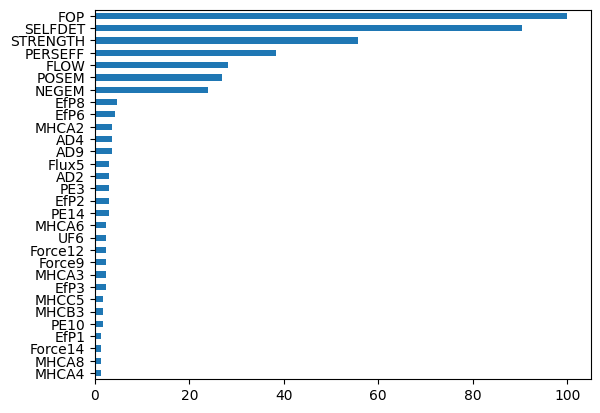

In [ ]:
# plot the 30 highest importance values
importance_percent['importance'][-30:].plot(kind='barh')
plt.show()

In [ ]:
# select only those feature for which importance is greater than 20% of the highest importance values
items_above_20_percent = importance_percent[importance_percent['importance'] > 20]

In [ ]:
items_above_20_percent

,importance,stddev,p_value,n,p99_high,p99_low
NEGEM,23.952096,41.827498,0.220990,100.0,29.535819,7.590724
POSEM,26.946108,46.020253,0.203741,100.0,32.904282,9.260862
FLOW,28.143713,28.140662,0.026882,100.0,28.142760,23.549098
PERSEFF,38.323353,37.656977,0.025125,100.0,38.115198,32.528059
STRENGTH,55.688623,78.310898,0.099028,100.0,62.755123,30.837754
SELFDET,90.419162,55.457249,0.003959,100.0,79.498140,100.000000
FOP,100.000000,100.000000,0.026893,100.0,100.000000,83.666906


In [ ]:
# Make a copy of the DataFrame slice
items_above_20_percent_copy = items_above_20_percent.copy()

# Now rename the index on the copied DataFrame
items_above_20_percent_copy.rename(index={'AD9':'AD9 - Mes sentiments sont pris en considération au travail',
                                          'AD4': "AD4 - Je m'entends bien avec les collègues de travail",
                               'AD2':"AD2 - J'apprécie vraiment les personnes avec lesquelles je travaille",
                               'UF3':"UF3 - Je m'appuie sur mes forces les plus développées dans mon travail",
                                          'EfP3' : "EfP3 - C'est facile pour moi de me fixer sur mes objectifs et d'accomplir mes buts.",
                                          'PE10': "PE10 - (J'ai ressenti) de la haine ou de la méfiance ou de la suspicion",
                               'Flux6':"Flux6 - Je suis entièrement absorbé par ce que je fais",
                               'AD2':"AD2 - J'apprécie vraiment les personnes avec lesquelles je travaille",
                               'MHCA1':"MHCA1 - (Je suis) heureux",
                               'EfP8':"EfP8 - Peu importe ce qui arrive, généralement je suis capable d'y faire face",
                               'PE11':"PE1 - (Je suis) rassuré ou optimiste ou plein d’espoir",
                               'Flux5':"Flux5 - Mon esprit est tout à fait clair"}, inplace=True)

# Now you can use items_above_20_percent_copy without the error
items_above_20_percent_copy


,importance,stddev,p_value,n,p99_high,p99_low
NEGEM,23.952096,41.827498,0.220990,100.0,29.535819,7.590724
POSEM,26.946108,46.020253,0.203741,100.0,32.904282,9.260862
FLOW,28.143713,28.140662,0.026882,100.0,28.142760,23.549098
PERSEFF,38.323353,37.656977,0.025125,100.0,38.115198,32.528059
STRENGTH,55.688623,78.310898,0.099028,100.0,62.755123,30.837754
SELFDET,90.419162,55.457249,0.003959,100.0,79.498140,100.000000
FOP,100.000000,100.000000,0.026893,100.0,100.000000,83.666906


In [ ]:
# select the features above the 20% threshold
list(items_above_20_percent.index) + [outcome]

['NEGEM', 'POSEM', 'FLOW', 'PERSEFF', 'STRENGTH', 'SELFDET', 'FOP', 'CL_FOP']

In [ ]:
# create anew dataframe with only those features
df_simple = df.loc[:,list(items_above_20_percent.index) + [outcome]]
df_simple.info()
df_simple.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NEGEM     1066 non-null   float64
 1   POSEM     1066 non-null   float64
 2   FLOW      1066 non-null   float64
 3   PERSEFF   1066 non-null   float64
 4   STRENGTH  1066 non-null   float64
 5   SELFDET   1066 non-null   float64
 6   FOP       1066 non-null   float64
 7   CL_FOP    1066 non-null   object 
dtypes: float64(7), object(1)
memory usage: 66.8+ KB


,NEGEM,POSEM,FLOW,PERSEFF,STRENGTH,SELFDET,FOP,CL_FOP
0,0.131,0.025,0.446,-0.559,-0.220,-0.020,1.601,Self-Motivated Functioning
1,-1.133,-1.433,-0.144,-2.131,-0.027,-0.886,-2.503,Resilient Dysfunctioning
2,-0.058,-0.462,-0.411,0.688,-1.010,-0.273,-0.797,Fully Dysfunctioning
3,-0.841,1.041,-0.360,1.721,1.203,-2.028,0.519,Resilient Dysfunctioning
4,0.777,-0.930,-0.735,-2.280,-0.968,-0.764,0.631,Resilient Dysfunctioning


In [ ]:
# split that simple dataframe into a training and test set
simple_train, simple_test = train_test_split(df_simple, test_size=0.2, stratify=df_simple[outcome], random_state=0)

In [ ]:
path_to_model_simple = "./factor_scores_models_simple"

In [ ]:
# fit with TabularPredictor
try:
  simple_model = TabularPredictor.load(path_to_model_simple)
except:
  simple_model = TabularPredictor(label=outcome, path=path_to_model_simple).fit(simple_train, presets=presets)

This means that the predictor was fit in a version `<=0.3.1`.
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-f

In [ ]:
# Evaluate model
simple_model.evaluate(simple_test)

{'accuracy': 0.9158878504672897,
 'balanced_accuracy': 0.8956374085684431,
 'mcc': 0.8782470218199047}

In [ ]:
# Check the leaderboard on the test sample
lead_df = simple_model.leaderboard(simple_test)
lead_df

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L1_FULL,0.920561,NaN,accuracy,0.014757,NaN,0.431641,0.014757,NaN,0.431641,1,True,14
1,WeightedEnsemble_L2_FULL,0.915888,NaN,accuracy,0.323761,NaN,6.893746,0.006548,NaN,0.164510,2,True,24
2,CatBoost_BAG_L1_FULL,0.911215,NaN,accuracy,0.008020,NaN,0.699370,0.008020,NaN,0.699370,1,True,18
3,LightGBM_BAG_L1_FULL,0.901869,NaN,accuracy,0.015087,NaN,0.467720,0.015087,NaN,0.467720,1,True,15
4,NeuralNetFastAI_BAG_L1_FULL,0.892523,NaN,accuracy,0.018879,NaN,0.681143,0.018879,NaN,0.681143,1,True,13
5,ExtraTreesGini_BAG_L1,0.892523,0.863850,accuracy,0.113271,0.110258,0.760306,0.113271,0.110258,0.760306,1,True,7
6,ExtraTreesGini_BAG_L1_FULL,0.892523,NaN,accuracy,0.122638,0.110258,0.760306,0.122638,0.110258,0.760306,1,True,19
7,NeuralNetTorch_BAG_L1_FULL,0.887850,NaN,accuracy,0.013620,NaN,3.829542,0.013620,NaN,3.829542,1,True,22
8,XGBoost_BAG_L1_FULL,0.883178,NaN,accuracy,0.043761,NaN,0.338407,0.043761,NaN,0.338407,1,True,21
9,ExtraTreesEntr_BAG_L1_FULL,0.873832,NaN,accuracy,0.103557,0.112383,0.688196,0.103557,0.112383,0.688196,1,True,20


### Check the performance of the best model on the test set

In [ ]:
# load the simple model trained through validation sets
predictor = TabularPredictor.load(path_to_model_simple)

In [ ]:
# select the best model based on the test set
best_model = lead_df.loc[0, "model"]

In [ ]:
# compute the predicted outcome by that best model
y_pred = predictor.predict(simple_test, best_model)

In [ ]:
# define the original outcome
y_test = simple_test[outcome]

In [ ]:
# compute the performance using accuracy, kappa scores, precision recall and F1 score (on 0.5 threshold)
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

In [ ]:
accuracy

0.9205607476635514

In [ ]:
kappa

0.8844859338286658

In [ ]:
print(classification_report(y_test, y_pred))

                            precision    recall  f1-score   support

   Emotionally Functioning       0.82      0.82      0.82        11
      Fully Dysfunctioning       0.92      0.93      0.92        58
  Resilient Dysfunctioning       0.95      0.91      0.93        87
Self-Motivated Functioning       0.90      0.95      0.92        58

                  accuracy                           0.92       214
                 macro avg       0.90      0.90      0.90       214
              weighted avg       0.92      0.92      0.92       214



In [ ]:
class_names = list(y_test.unique())

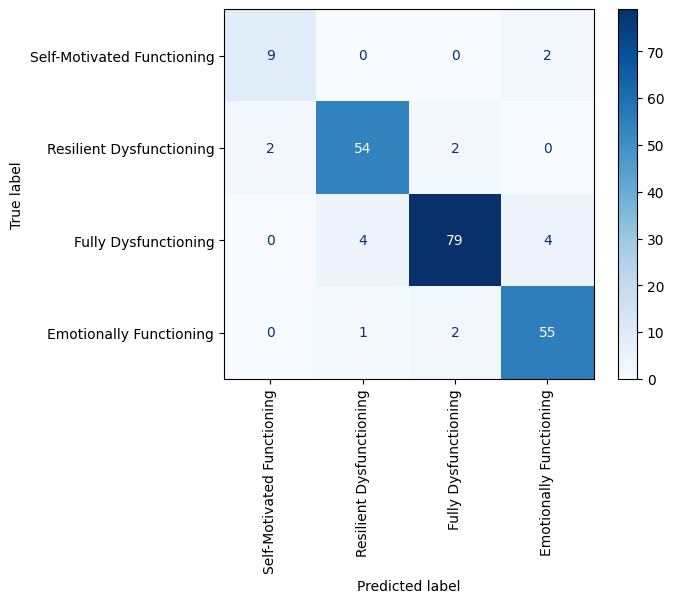

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=class_names).plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90);